Prepared by: Tan Ming Jie

---

## Introduction

In this notebook, we will be conducting a simple analysis on the DVD Rental database with SQL queries in a Jupyter environment.

The main objective of this project is to practice and expose myself to writing SQL queries to query from an actual database.

---

## Problem Statement

How can the DVD rental store optimize its inventory and pricing strategies to meet customer demands, increase revenue, and improve its rental performance while taking into account the popularity and revenue generated by different genres and individual movies?

---

## Approach

1) Load database into PostgreSQL using dvdrental.tar file

2) Connect to database using sqlalchemy & psycopg2

3) Run SQL queries to query from database

4) Visualise outputs of the SQL queries with matplotlib & seaborn

5) Conclusion & Recommendations

---

## Import Libraries

In [1]:
from sqlalchemy import create_engine, text
import psycopg2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Connecting to database

In [2]:
# database connection string
db_string = ---

# create database engine
engine = create_engine(db_string)

In [3]:
# connect to the database
connection = engine.connect()

---

## Database Schema

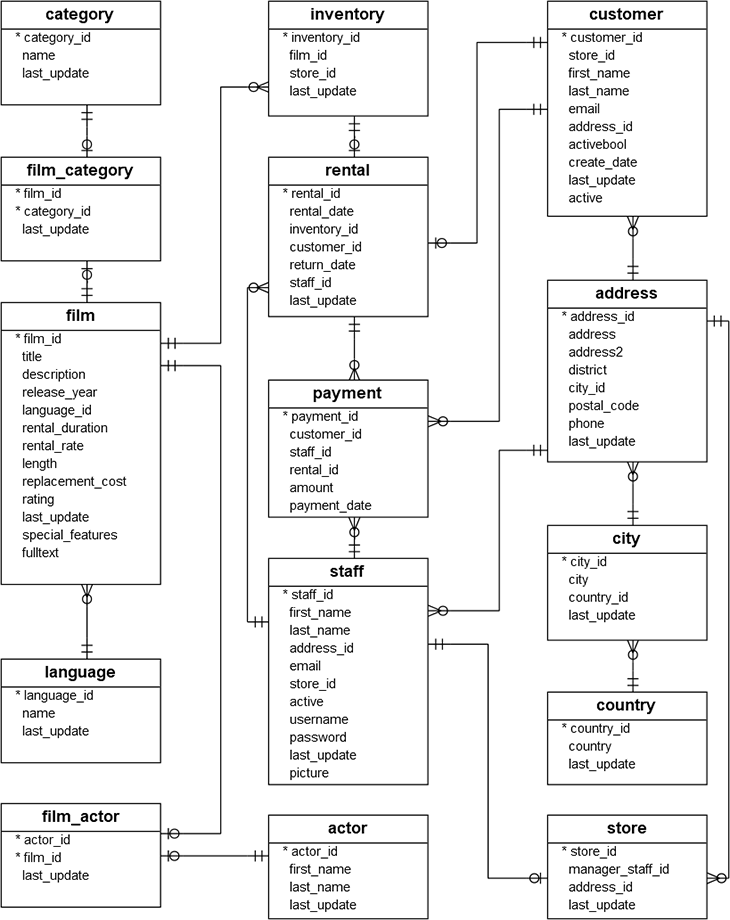

---

## Data Analysis

**In the analysis, we will be exploring these few pointers.**

- [Top 10 Most Popular Movies](#Top-10-Most-Popular-Movies)

- [Top 10 Least Popular Movies](#Top-10-Least-Popular-Movies)

- [Rental Popularity by Genre](#Rental-Popularity-by-Genre)

- [Top 3 Most Rented Movies by Genre](#Top-3-Most-Rented-Movies-by-Genre)

- [Revenue Generating Films](#Revenue-Generating-Films)

- [Revenue by Month](#Revenue-by-Month)

- [Revenue by Month by Genre](#Revenue-by-Month-by-Genre)

- [Films with price of rental greater than the rental price of top 3 most rented films](#Films-with-price-of-rental-greater-than-the-rental-price-of-top-3-most-rented-films)

- [Conclusion & Recommendations](#Conclusion-&-Recommendations)

In [4]:
# function to load SQL query into a dataframe immediately
def load_query(query):
    df = pd.read_sql(text(query),connection)
    return df

#### Top 10 Most Popular Movies 

In [5]:
# Query top 10 most popular movies in the database using number of times rented in rental table
top10_most_popularmovies = load_query("""

SELECT title film_title, COUNT(title) count
FROM rental r JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
GROUP BY title
ORDER BY count DESC
LIMIT 10

 """)

top10_most_popularmovies.head()

,film_title,count
0,Bucket Brotherhood,34
1,Rocketeer Mother,33
2,Juggler Hardly,32
3,Ridgemont Submarine,32
4,Grit Clockwork,32


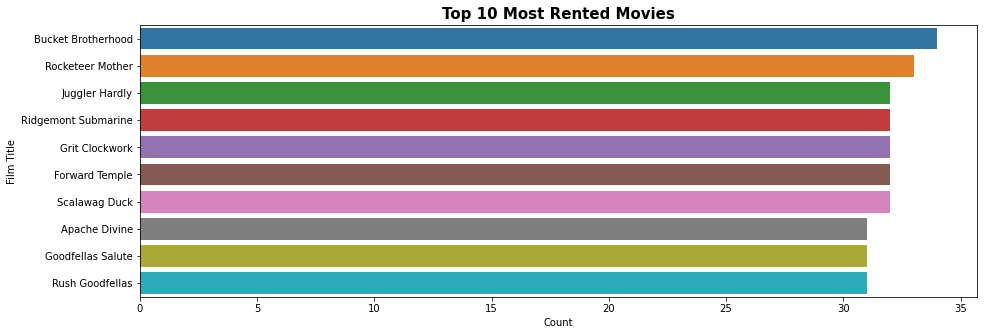

In [6]:
plt.figure(figsize=(15,5))
sns.barplot(data = top10_most_popularmovies, x='count', y='film_title')
plt.title('Top 10 Most Rented Movies', fontsize=15, fontweight='bold')
plt.ylabel('Film Title')
plt.xlabel('Count');

#### Top 10 Least Popular Movies

In [7]:
# Query top 10 least popular movies in the database using number of times rented in rental table
top10_least_popularmovies = load_query("""

SELECT title film_title, COUNT(title) count
FROM rental r JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
GROUP BY title
ORDER BY count ASC
LIMIT 10

 """)

top10_least_popularmovies.head()

,film_title,count
0,Train Bunch,4
1,Hardly Robbers,4
2,Mixed Doors,4
3,Mussolini Spoilers,5
4,Braveheart Human,5


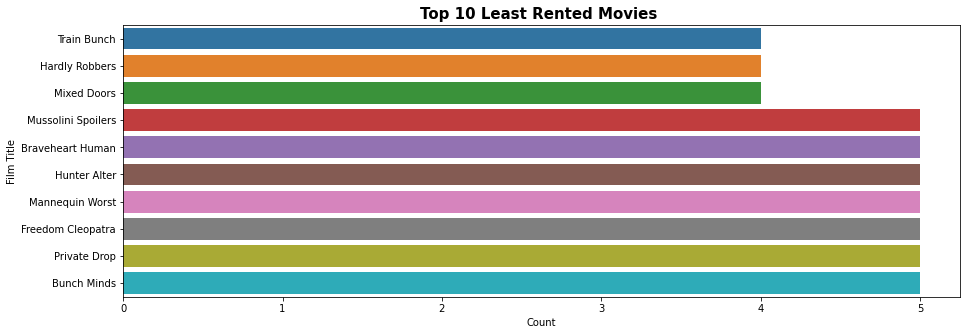

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(data = top10_least_popularmovies, x='count', y='film_title')
plt.title('Top 10 Least Rented Movies ', fontsize=15, fontweight='bold')
plt.ylabel('Film Title')
plt.xlabel('Count');

#### Rental Popularity by Genre

In [9]:
# Query popularity of genre with regards to the number of times rented in the database
popularity_genre = load_query("""

SELECT c.name genre, COUNT(rental_id) count
FROM rental r JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film_category fc ON i.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY genre
ORDER BY count DESC

""")

popularity_genre.head()

,genre,count
0,Sports,1179
1,Animation,1166
2,Action,1112
3,Sci-Fi,1101
4,Family,1096


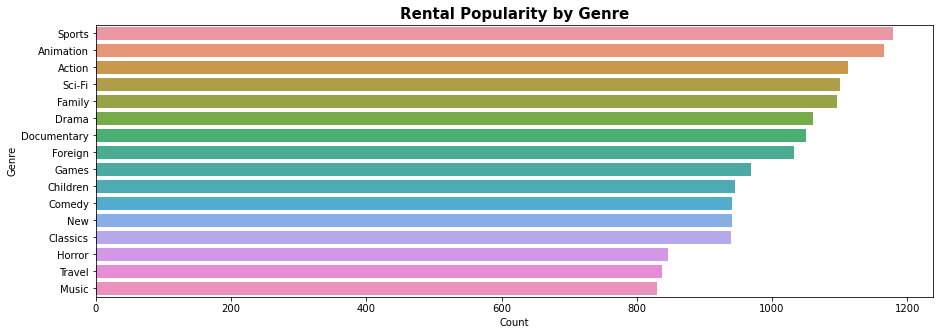

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(data =popularity_genre, x='count', y='genre')
plt.title('Rental Popularity by Genre', fontsize=15, fontweight='bold')
plt.ylabel('Genre')
plt.xlabel('Count');

#### Top 3 Most Rented Movies by Genre

In [11]:
# Use WITH clause to JOIN tables with necessary information
# Use DENSE_RANK() to rank the COUNT of rental per title PARTITION BY genre
# Used DENSE_RANK() to get distinct rankings so there are no multiple number ones
# Ordered by count then order by title
# Use WHERE clause to get the top 3 rank

popular_movies_bygenre = load_query("""

WITH temp_table AS (SELECT c.name, f.title, COUNT(f.title) count
FROM rental r JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film_category fc ON i.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
JOIN film f ON i.film_id = f.film_id
GROUP BY c.name, f.title)

SELECT * 
FROM
(SELECT name genre,
title movie_title,
count rent_count,
DENSE_RANK() OVER (PARTITION BY name ORDER BY count DESC, title ASC) rank
FROM temp_table) as x
WHERE x.rank <= 3


""")

popular_movies_bygenre

,genre,movie_title,rent_count,rank
0,Action,Rugrats Shakespeare,30,1
1,Action,Suspects Quills,30,2
2,Action,Handicap Boondock,28,3
3,Animation,Juggler Hardly,32,1
4,Animation,Dogma Family,30,2
5,Animation,Storm Happiness,29,3
6,Children,Robbers Joon,31,1
7,Children,Idols Snatchers,30,2
8,Children,Sweethearts Suspects,29,3
9,Classics,Timberland Sky,31,1


#### Revenue Generating Films 

In [12]:
# Query the sum of payments grouped by the film title
# LEFT JOIN used to account for all of the rental

revenue_films = load_query("""

SELECT f.title film_title, SUM(p.amount) revenue
FROM rental r JOIN payment p ON r.rental_id = p.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
GROUP BY f.title, f.film_id
ORDER BY revenue DESC
LIMIT 10

""")

revenue_films.head()

,film_title,revenue
0,Telegraph Voyage,215.75
1,Zorro Ark,199.72
2,Wife Turn,198.73
3,Innocent Usual,191.74
4,Hustler Party,190.78


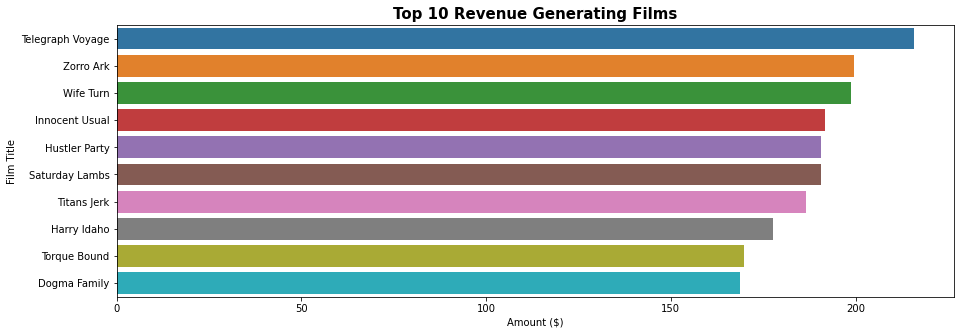

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(data = revenue_films, x='revenue', y='film_title')
plt.title('Top 10 Revenue Generating Films', fontsize=15, fontweight='bold')
plt.ylabel('Film Title')
plt.xlabel('Amount ($)');

#### Revenue Generating Genre

In [14]:
# Query the sum of payments grouped by the genre
# LEFT JOIN used to account for all of the rental

revenue_genre = load_query("""

SELECT c.name genre, SUM(p.amount) revenue
FROM rental r JOIN payment p ON r.rental_id = p.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY revenue DESC

""")

revenue_genre.head()

,genre,revenue
0,Sports,4892.19
1,Sci-Fi,4336.01
2,Animation,4245.31
3,Drama,4118.46
4,Comedy,4002.48


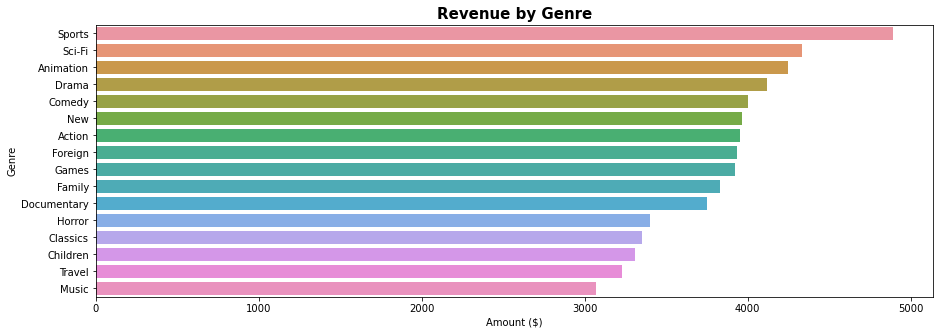

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(data = revenue_genre, x='revenue', y='genre')
plt.title('Revenue by Genre', fontsize=15, fontweight='bold')
plt.ylabel('Genre')
plt.xlabel('Amount ($)');

#### Revenue by Month

In [16]:
load_query("""

SELECT MIN(payment_date), MAX(payment_date)
FROM payment

""")

,min,max
0,2007-02-14 21:21:59.996577,2007-05-14 13:44:29.996577


Notice that the payment dates spans from 14/02/2007 to 14/05/2007 only

In [17]:
# Query sum of amount grouped by month

revenue_month = load_query("""

SELECT 
EXTRACT(MONTH from payment_date) as month, SUM(amount) revenue
FROM payment 
GROUP BY month
ORDER BY month

""")

revenue_month.head()

,month,revenue
0,2.0,8351.84
1,3.0,23886.56
2,4.0,28559.46
3,5.0,514.18


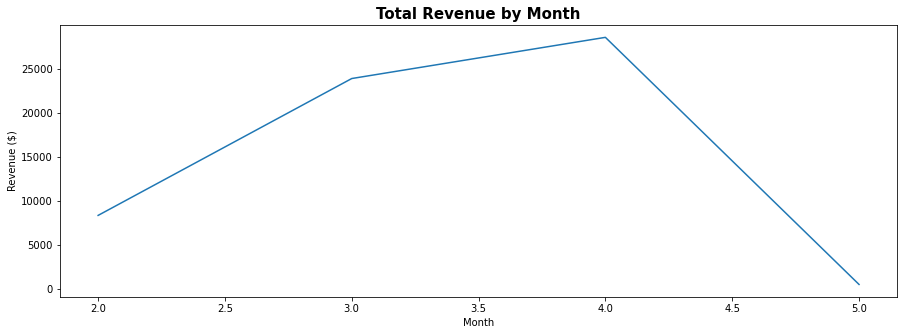

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(data=revenue_month, x="month", y="revenue", )
plt.title('Total Revenue by Month', fontsize=15, fontweight='bold')
plt.ylabel('Revenue ($)')
plt.xlabel('Month');

#### Revenue by Month by Genre

In [19]:
revenue_month_genre = load_query("""

SELECT 
EXTRACT(MONTH from payment_date) as month,
c.name genre,
SUM(amount) revenue

FROM rental r JOIN payment p ON r.rental_id = p.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id

GROUP BY month, c.name
ORDER BY name, month 


""")

revenue_month_genre.head(8)

,month,genre,revenue
0,2.0,Action,628.52
1,3.0,Action,1448.19
2,4.0,Action,1819.33
3,5.0,Action,55.80
4,2.0,Animation,569.53
5,3.0,Animation,1642.95
6,4.0,Animation,1966.08
7,5.0,Animation,66.75


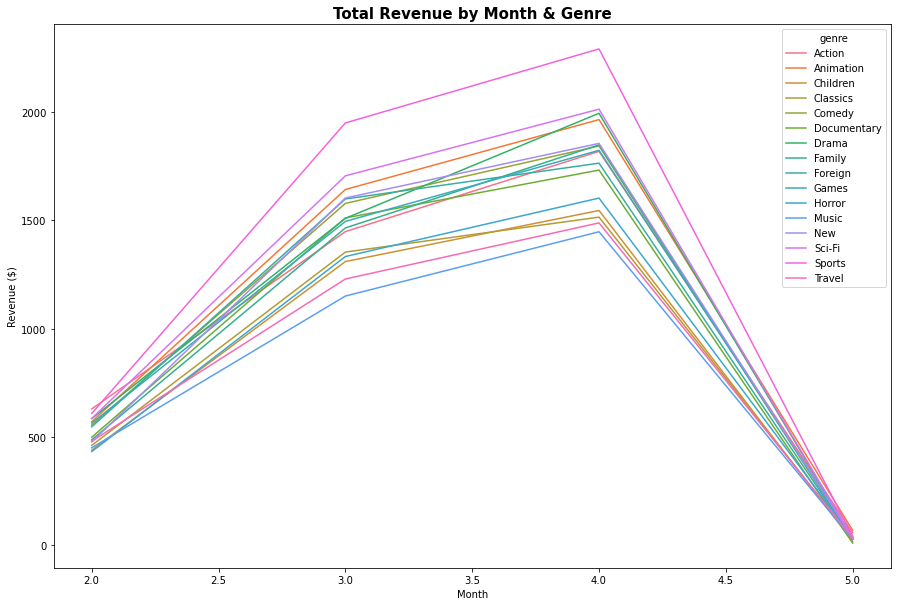

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(data=revenue_month_genre, x="month", y="revenue", hue="genre")
plt.title('Total Revenue by Month & Genre', fontsize=15, fontweight='bold')
plt.ylabel('Revenue ($)')
plt.xlabel('Month');

Since the number of months available in the database is quite limited, it is difficult to draw any conclusion.

#### Films with price of rental greater than the rental price of top 3 most rented films

In [21]:
# Query the genre and titles of films that has a rental cost greater than the top 3 films
# and is not in the top 3

load_query("""

WITH t1 AS 
(SELECT c.name, f.title, COUNT(f.title) count, MAX(amount) amount
FROM rental r JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film_category fc ON i.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
JOIN film f ON i.film_id = f.film_id
JOIN payment p ON p.rental_id = r.rental_id
GROUP BY c.name, f.title),
t2 AS 
(SELECT name, title, count, amount, DENSE_RANK() OVER (PARTITION BY name ORDER BY name ASC, count DESC) rank 
FROM t1)

SELECT name genre, title film_title
FROM t2 
WHERE amount > (SELECT MAX(amount) FROM t2 WHERE rank <= 3) AND rank > 3

""")

,genre,film_title
0,Children,Ties Hunger
1,Comedy,Flintstones Happiness
2,Documentary,Midsummer Groundhog
3,Drama,Scorpion Apollo
4,Foreign,Trap Guys
5,New,Sting Personal
6,New,Mine Titans


--- 

## Conclusion & Recommendations

---

**1) Increasing rental prices for action films**

-  Top 3 Genres based on rental include Sports, Animation and Action

-  Top 3 Genres based on revenue include Sports, Sci-Fi and Animation

Notice that Action ranks 3rd based on the rental while ranking 7th based on the revenue generated. This is where the DVD store can experiment with increasing the rental prices for action films since there is a demand for action films.

---

**2) General price adjustments**

- Other than increasing rental prices for action films, the store can also consider **increasing the rental prices for popular films** due to the high demand and **reduce the prices for the less popular films**.  

- the DVD rental store can also consider **having promotions for these films to increase the number of rents for less popular films.**

- After identifying the list of film titles that has a rental price greater than the rental price of the top 3 most rented films, the DVD rental store can lower the prices of these films in order to increase the rental count of these films. 

---

**3) Meeting customer demands**

- Based on the number of rents, the DVD rental store can consider **bringing in more films from the popular genres**.

- Based on the top 3 rented films by genre, the DVD rental store can also consider **bringing in more copies of the top 3 films of every genre.**

- Based on the top 10 rented films, the DVD rental store can **bring in more copies of the popular films.**

By meeting the customer demands, the DVD rental store would be able to optimise the company's inventory and generate more revenue. 

The opposite can be inferred for the less popular films & genres.

---